<a href="https://colab.research.google.com/github/ssook1222/bigdata-analysist-certificate/blob/master/bigdata-analysist-certificate/task3/task3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## scipy 튜토리얼

## 정규성 검정

### Question 1

다음 데이터의 정규성을 검증하라

`shapiro` (샤피로 검정)     
- 노말분포 가장 엄격하게 검정할 때 사용함.
- 데이터수가 상대적으로 적을 때 사용함.

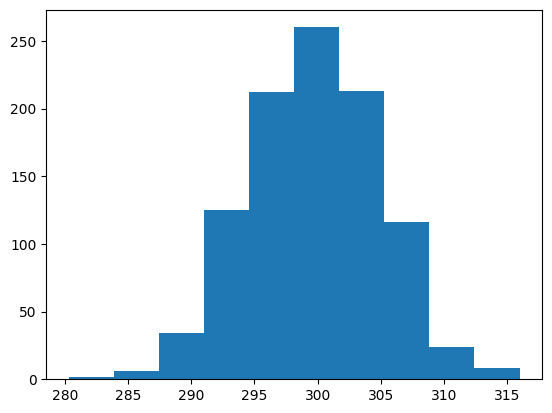

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


샤피로 검정시 p-value가 0.34이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다

---

### Question 2

다음 데이터의 정규성을 검증하라



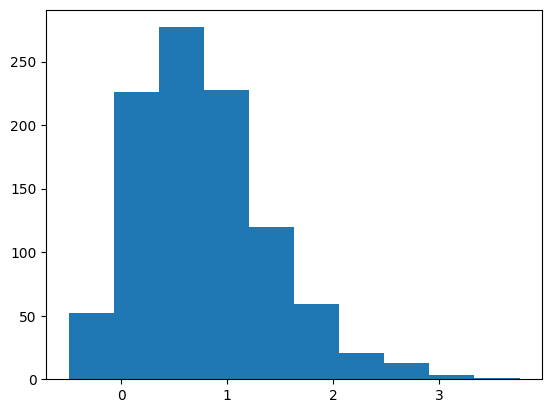

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [4]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


샤피로 검정시 p-value가 2.30이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 있다.

---

### Question 3

위의 데이터를 log변환 한 후에 정규성을 가지는지 확인하라

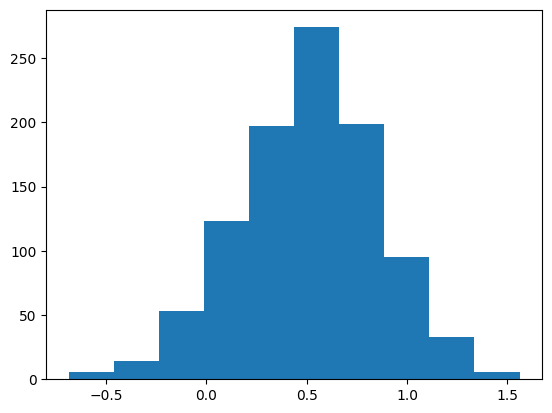

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()

`np.log1p(df)`

- log1p를 통해 로그 변환이 가능

In [6]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


샤피로 검정시 p-value가 2.30이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 있다.

---

### Question 4

다음 데이터의 정규성을 검증하라

다시 한 번 풀어보기!

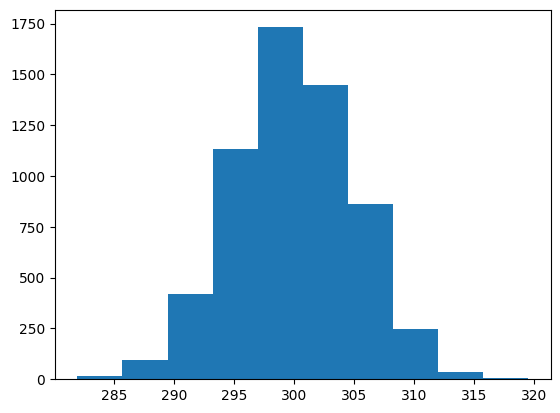

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [8]:
from scipy.stats import shapiro
print(shapiro(df)) # 5000개의 데이터가 넘어서 샤피로 검정 사용 불가

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
from scipy.stats import anderson
print(anderson(df['data'].values))

AndersonResult(statistic=0.8266993530405671, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


`significance_level`는 유의 확률값을 나타내며 `critical_values`는 각 유의 확률값의 기준점이 된다.

5%유의 수준에서 검정을 진행하려면 statistic값인 0.82이 significance_level 이 5.에 위치한 인덱스를 critical_values값에서 비교하면 된다.
그 값은 0.786이므로 이보다 큰 0.82을 가지므로 귀무가설을 기각하고 대립가설을 채택한다.
즉, 데이터는 정규성을 가지지 않는다고 판단. (p-value와 기각기준 부등호 개념이 반대)

---

## 단일 표본 t검정 (one-sample)

### Question 5

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [11]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

In [12]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9872668981552124, pvalue=0.4558176100254059)


샤피로 검정시 p-value가 0.45이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다. 정규성을 만족하므로 단일 표본 검증이다.

In [15]:
from scipy.stats import ttest_1samp # 단일 표본 검정
static, pvalue = ttest_1samp(df['height'],165)
print(pvalue)

0.0018367171548080209


단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며
대립가설은 "100명 키의 평균은 165가 아니다." 이다.  
검정 결과 pvalue는 0.0018367171548080209로 결과는 귀무가설을 기각하고 대립가설을 채택한다.